### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Reading data

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Number of unique hosts in new york

In [3]:
data['host_id'].nunique()

37457

### Number of listings per host in new york

In [4]:
df = data.groupby('host_id')['id'].count() 
print(f'The host with maximum listings is host ID {df.idxmax()} with {df.max()} listings and the host name is ',end="")
print("".join(data[data['host_id'] == df.idxmax()]['host_name'].unique()))

The host with maximum listings is host ID 219517861 with 327 listings and the host name is Sonder (NYC)


### Number of listing per neighbourhood group in new york

In [5]:
df = data.groupby('neighbourhood_group')['id'].count() 
print(f'The neighbourhood group with maximum listing is {df.idxmax()} with {df.max()} listings')
print(f'The neighbourhood group with minimum listing is {df.idxmin()} with {df.min()} listings')

The neighbourhood group with maximum listing is Manhattan with 21661 listings
The neighbourhood group with minimum listing is Staten Island with 373 listings


### Number of listing per room type

In [6]:
df = data.groupby('room_type')['id'].count() 
print(f'The room type with maximum listing is {df.idxmax()} with {df.max()} listings')
print(f'The neighbourhood group with minimum listing is {df.idxmin()} with {df.min()} listings')

The room type with maximum listing is Entire home/apt with 25409 listings
The neighbourhood group with minimum listing is Shared room with 1160 listings


### Average price of listing as per room type

In [7]:
df = data.groupby('room_type')['price'].mean()
df

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

### Average price of listing as per neighbourhood group

In [8]:
df = data.groupby('neighbourhood_group')['price'].mean()
df

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

### Let's plot the listings on a map

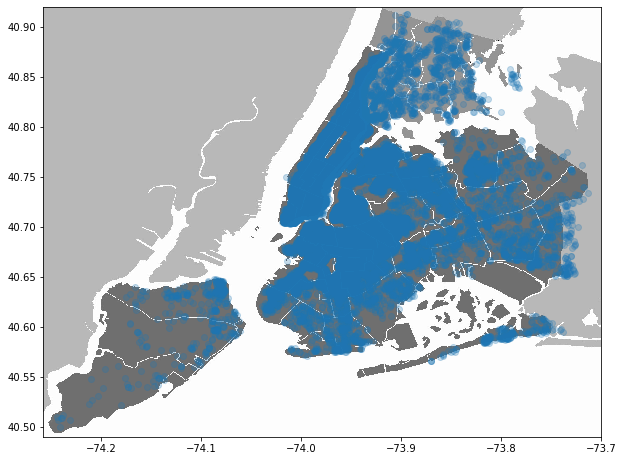

In [26]:
NYC_map = plt.imread('New_York_City.png',0)

plt.figure(figsize=(10,8))

plt.imshow(NYC_map, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])

ax = plt.gca()

plt.scatter(data['longitude'], data['latitude'], cmap=plt.get_cmap('brg'), alpha=0.25)

### Finding the most common words used in description (name) of high priced listings

In [9]:
print(data['price'].mean())
df = data[data['price'] > data['price'].mean()]
df

152.7206871868289


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
16,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1.72,1,321
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48872,36476675,Nycity-MyHome,8636072,Ben,Manhattan,Hell's Kitchen,40.76236,-73.99255,Entire home/apt,260,3,0,NaN,NaN,1,9
48873,36477307,Brooklyn paradise,241945355,Clement & Rose,Brooklyn,Flatlands,40.63116,-73.92616,Entire home/apt,170,1,0,NaN,NaN,2,363
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaN,NaN,1,341
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176


### The most common words used for high priced listings are given in the word cloud. Using the following words might affect positively on the price of listing

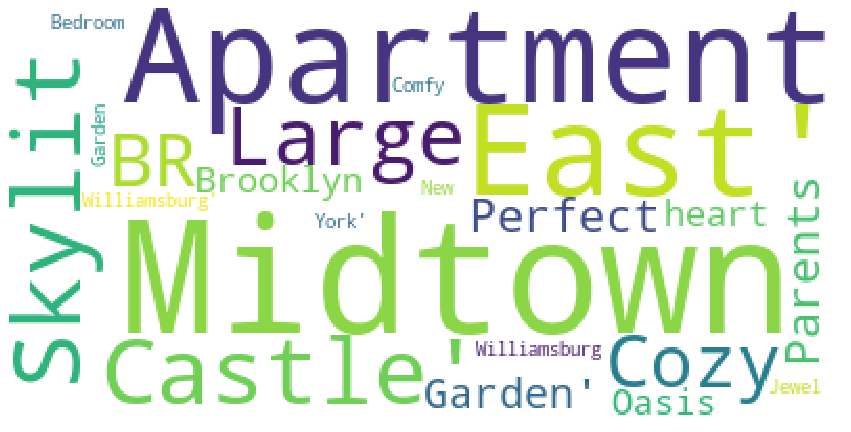

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(background_color = "white", max_words = 200)
wordcloud = cloud.generate(str(df['name'].values))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Finding if there are any missing values and deal with it later

In [18]:
col_with_na = [col for col in data.columns if data[col].isnull().sum() >= 1]
for col in col_with_na:
    print(col,'has',data[col].isnull().sum(),'missing values.')

name has 16 missing values.
host_name has 21 missing values.
last_review has 10052 missing values.
reviews_per_month has 10052 missing values.


### We will remove all descriptive attributes, that means all ID's and all Names

In [28]:
df = data.drop(['id','name','host_id','host_name'],axis=1)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### We will next drop latitude and longitude because the importance of location is covered by neighbourhood_group and neighbourhood, and also last review

In [32]:
df = df.drop(['latitude','longitude','last_review'],axis=1)

### We will now convert the string attributes into numeric attributes, since neighbourhood,neighbourhood_group and room_type are categorical attributes with limited values

In [34]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood_group'] = df['neighbourhood_group'].cat.codes
df['neighbourhood'] = df['neighbourhood'].cat.codes
df['room_type'] = df['room_type'].cat.codes

### Now let's fill all the null values

In [37]:
df.fillna(0,inplace=True)

### Now let us look at the data, now every feature is numerical which can be used for model training

In [38]:
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,149,1,9,0.21,6,365
1,2,127,0,225,1,45,0.38,2,355
2,2,94,1,150,3,0,0.00,1,365
3,1,41,0,89,1,270,4.64,1,194
4,2,61,0,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,1,13,1,70,2,0,0.00,2,9
48891,1,28,1,40,4,0,0.00,2,36
48892,2,94,0,115,10,0,0.00,1,27
48893,2,95,2,55,1,0,0.00,6,2


### Now let us draw a correlation map, since the dependent variable is price we have to see correlation of other independent variables with respect to price

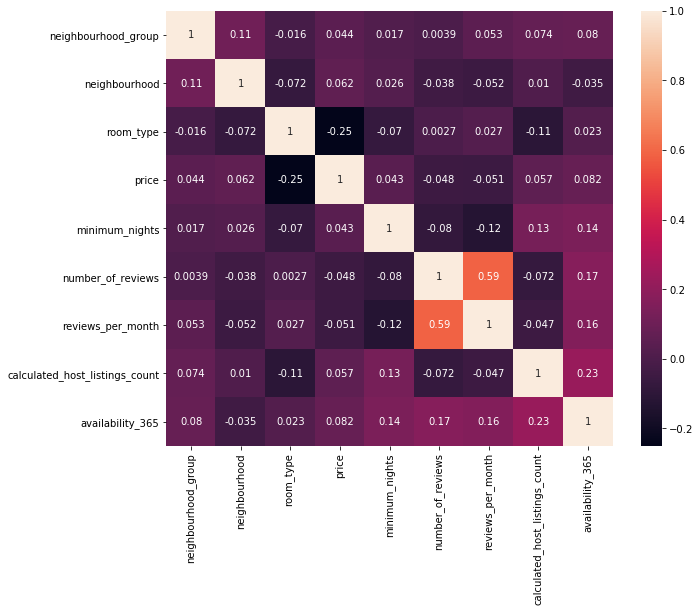

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(df.corr(),annot=True)

### Unfortunately correlation map shows us that the data present is not good enough for us to predict prices